In [152]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0


In [153]:
data = data.drop(columns=['Id'])
data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0


In [154]:
data.shape

(7500, 17)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   int64  
 4   Number of Open Accounts       7500 non-null   int64  
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   int64  
 7   Number of Credit Problems     7500 non-null   int64  
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   int64  
 13  Cur

In [156]:
data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [157]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

X = data.drop(['Credit Default'], axis=1) 
y = data['Credit Default'] 

y

0       0
1       1
2       0
3       0
4       0
       ..
7495    0
7496    1
7497    0
7498    0
7499    0
Name: Credit Default, Length: 7500, dtype: int64

In [158]:
y.value_counts()

Credit Default
0    5387
1    2113
Name: count, dtype: int64

In [159]:
for column in X.columns:
    if X[column].dtype in ['float64', 'int64']:
        mode = X[column].mode()[0]
        X[column].fillna(mode, inplace=True)


In [160]:
continuous_features = X.select_dtypes(include=['float64', 'int64']).columns
discrete_features = X.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X_continuous = scaler.fit_transform(X[continuous_features])

label_encoder = LabelEncoder()

X['Years in current job'] = label_encoder.fit_transform(X['Years in current job'])
X

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Own Home,482087.0,11,0,11,26.3,685960,1,14.0,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0
1,Own Home,1025487.0,1,0,15,15.3,1181730,0,14.0,0.0,debt consolidation,Long Term,264968,394972,18373,737.0
2,Home Mortgage,751412.0,8,0,11,35.0,1182434,0,14.0,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0
3,Own Home,805068.0,6,0,8,22.5,147400,1,14.0,1.0,debt consolidation,Short Term,121396,95855,11338,694.0
4,Rent,776264.0,8,0,13,13.6,385836,1,14.0,0.0,debt consolidation,Short Term,125840,93309,7180,719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,10,0,3,8.5,107866,0,14.0,0.0,other,Short Term,129360,73492,1900,697.0
7496,Home Mortgage,1533984.0,0,0,10,26.5,686312,0,43.0,0.0,debt consolidation,Long Term,444048,456399,12783,7410.0
7497,Rent,1878910.0,6,0,12,32.1,1778920,0,14.0,0.0,buy a car,Short Term,99999999,477812,12479,748.0
7498,Home Mortgage,969475.0,11,0,21,26.5,1141250,0,14.0,0.0,debt consolidation,Short Term,615274,476064,37118,740.0


In [161]:
onehot_encoder = OneHotEncoder()
X_discrete = onehot_encoder.fit_transform(X[discrete_features.drop(['Years in current job'])])

In [162]:
X = pd.concat([pd.DataFrame(X_continuous, columns=continuous_features),
              pd.DataFrame(X_discrete.toarray(), columns=onehot_encoder.get_feature_names_out(discrete_features.drop('Years in current job')))], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [163]:
X_train.info()
# X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1815 to 5900
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 6000 non-null   float64
 1   Tax Liens                     6000 non-null   float64
 2   Number of Open Accounts       6000 non-null   float64
 3   Years of Credit History       6000 non-null   float64
 4   Maximum Open Credit           6000 non-null   float64
 5   Number of Credit Problems     6000 non-null   float64
 6   Months since last delinquent  6000 non-null   float64
 7   Bankruptcies                  6000 non-null   float64
 8   Current Loan Amount           6000 non-null   float64
 9   Current Credit Balance        6000 non-null   float64
 10  Monthly Debt                  6000 non-null   float64
 11  Credit Score                  6000 non-null   float64
 12  Home Ownership_Have Mortgage  6000 non-null   float64
 13  Home 

In [164]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [165]:
X_train.info()
# X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8590 entries, 0 to 8589
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 8590 non-null   float64
 1   Tax Liens                     8590 non-null   float64
 2   Number of Open Accounts       8590 non-null   float64
 3   Years of Credit History       8590 non-null   float64
 4   Maximum Open Credit           8590 non-null   float64
 5   Number of Credit Problems     8590 non-null   float64
 6   Months since last delinquent  8590 non-null   float64
 7   Bankruptcies                  8590 non-null   float64
 8   Current Loan Amount           8590 non-null   float64
 9   Current Credit Balance        8590 non-null   float64
 10  Monthly Debt                  8590 non-null   float64
 11  Credit Score                  8590 non-null   float64
 12  Home Ownership_Have Mortgage  8590 non-null   float64
 13  Hom

In [166]:
print("Logistic Regression:")
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("AUC: ", roc_auc_score(y_test, y_pred_lr))

Logistic Regression:
Confusion Matrix:
 [[772 320]
 [136 272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      1092
           1       0.46      0.67      0.54       408

    accuracy                           0.70      1500
   macro avg       0.65      0.69      0.66      1500
weighted avg       0.74      0.70      0.71      1500

AUC:  0.6868131868131867


In [167]:
lr = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5, 
    scoring='roc_auc'
)

grid_search.fit(X_train, y_train)

print("最佳参数组合:", grid_search.best_params_)

lr_best = grid_search.best_params_

best_lr = grid_search.best_estimator_

y_pred_lr = best_lr.predict(X_test)
print(y_pred_lr)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

print("Classification Report:\n", classification_report(y_test, y_pred_lr))

y_pred_proba = best_lr.predict_proba(X_test)[:, 1]
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba)) 

最佳参数组合: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
[1 0 1 ... 0 1 0]
Confusion Matrix:
 [[775 317]
 [137 271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      1092
           1       0.46      0.66      0.54       408

    accuracy                           0.70      1500
   macro avg       0.66      0.69      0.66      1500
weighted avg       0.74      0.70      0.71      1500

测试集 AUC:  0.789157329598506


In [168]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_proba = rf.predict_proba(X_test)[:, 1]

print(" AUC: ", roc_auc_score(y_test, y_pred_proba))

 AUC:  0.7719869999281764


In [169]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc'
)

grid_search.fit(X_train, y_train)

print("最佳参数组合:", grid_search.best_params_)

rf_best = grid_search.best_params_

best_rf = grid_search.best_estimator_

y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

最佳参数组合: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
测试集 AUC:  0.7704585039143863


In [170]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

测试集 AUC:  0.7488463334051569


In [171]:
xgb_model = xgb.XGBClassifier()

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc'
)

grid_search.fit(X_train, y_train)

print("最佳参数组合:", grid_search.best_params_)

xgb_best = grid_search.best_params_

best_xgb = grid_search.best_estimator_

y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

最佳参数组合: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
测试集 AUC:  0.7590093729799612


In [172]:
lgb_model = lgb.LGBMClassifier(verbose=-1)

lgb_model.fit(X_train, y_train)

y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # 获取正类的概率

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))
y_pred_proba

测试集 AUC:  0.7681332148243913


array([0.99762952, 0.00273577, 0.60617634, ..., 0.04376524, 0.51961425,
       0.22656027])

In [173]:
lgb_model = lgb.LGBMClassifier(verbose=-1)

param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, -1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
)

grid_search.fit(X_train, y_train)

print("最佳参数组合:", grid_search.best_params_)

lgb_best = grid_search.best_params_

best_lgb = grid_search.best_estimator_

y_pred_proba = best_lgb.predict_proba(X_test)[:, 1]

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

最佳参数组合: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 127, 'subsample': 0.8}
测试集 AUC:  0.7654532967032968


测试集 AUC:  0.7654532967032968
最佳阈值: 0.9199999999999996
最大准确率: 0.7886666666666666


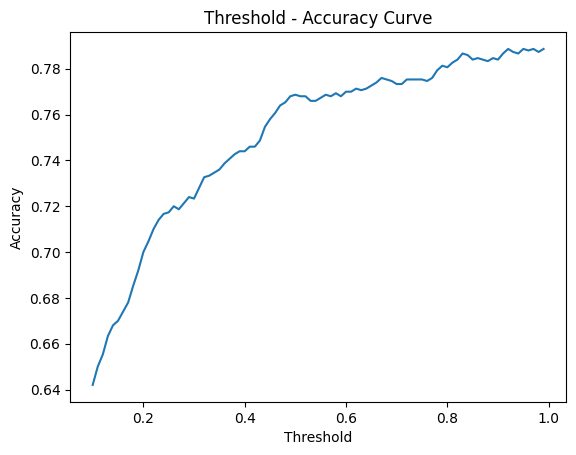

In [174]:
lgb_model = lgb.LGBMClassifier(**lgb_best)

lgb_model.fit(X_train, y_train)

y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

# 初始化列表用于存储不同阈值下的准确率
accuracies = []
thresholds = np.arange(0.1, 1, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 找到最大准确率及其对应的阈值
max_accuracy_index = np.argmax(accuracies)
optimal_threshold = thresholds[max_accuracy_index]
max_accuracy = accuracies[max_accuracy_index]

print(f"最佳阈值: {optimal_threshold}")
print(f"最大准确率: {max_accuracy}")

plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold - Accuracy Curve')
plt.show()

In [ ]:
base_models = [
    ('rf', RandomForestClassifier(**rf_best,
        random_state=42
    )),
    ('xgb', xgb.XGBClassifier(**xgb_best,
        random_state=42
    )),  # XGBoost
    ('lgbm', lgb.LGBMClassifier(**lgb_best,
        random_state=42
    ))  # LightGBM
]

meta_model_lgbm = lgb.LGBMClassifier(**lgb_best,
    random_state=42
)

# 创建 Stacking 分类器
stacking_model_lgbm = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model_lgbm
)

# 训练 Stacking 模型
stacking_model_lgbm.fit(X_train, y_train)

# 预测
y_test_pred_lgbm = stacking_model_lgbm.predict_proba(X_test)[:, 1]

# 计算 AUC
auc = roc_auc_score(y_test, y_test_pred_lgbm)
print(f"使用 LightGBM 作为元模型的 Stacking 测试集 AUC: {auc}")


使用 LightGBM 作为元模型的 Stacking 测试集 AUC: 0.7395519105077928


In [187]:
base_models = [
    ('rf', RandomForestClassifier(**rf_best,
        random_state=42
    )),
    ('xgb', xgb.XGBClassifier(**xgb_best,
        random_state=42
    )),  # XGBoost
    ('lgbm', lgb.LGBMClassifier(**lgb_best,
        random_state=42
    ))  # LightGBM
]

for name, model in base_models:
    model.fit(X_train, y_train)
    print(f"{name} 模型训练完成")

# 获取每个模型的预测结果

y_test_pred_rf = base_models[0][1].predict_proba(X_test)[:, 1]
y_test_pred_xgb = base_models[1][1].predict_proba(X_test)[:, 1]
y_test_pred_lgbm = base_models[2][1].predict_proba(X_test)[:, 1]

# 定义网格搜索范围
weights_rf = np.linspace(0, 1, 11)
weights_xgb = np.linspace(0, 1, 11)
weights_lgbm = np.linspace(0, 1, 11)

# 初始化最佳 AUC 和最佳权重
best_auc = float('inf')
best_weights = None

# 网格搜索
for w_rf in weights_rf:
    for w_xgb in weights_xgb:
        for w_lgbm in weights_lgbm:
            if w_rf + w_xgb + w_lgbm == 1:  # 确保权重之和为 1
                # 加权平均
                y_test_pred_weighted = (w_rf * y_test_pred_rf +
                                        w_xgb * y_test_pred_xgb +
                                        w_lgbm * y_test_pred_lgbm)
                # 计算 AUC
                auc = roc_auc_score(y_test, y_test_pred_weighted)
                # 更新最佳权重
                if auc < best_auc:
                    best_auc = auc
                    best_weights = (w_rf, w_xgb, w_lgbm)

# 输出最佳权重和 AUC
print(f"最佳权重：随机森林={best_weights[0]:.2f}, XGBoost={best_weights[1]:.2f}, LightGBM={best_weights[2]:.2f}")
print(f"最佳 AUC: {best_auc:.4f}")

rf 模型训练完成
xgb 模型训练完成
lgbm 模型训练完成
最佳权重：随机森林=0.00, XGBoost=0.00, LightGBM=1.00
最佳 AUC: 0.7643


In [ ]:
import statsmodels.api as sm

# 添加常数项（截距）
X_train_const = sm.add_constant(X_train)

# 使用 statsmodels 拟合逻辑回归模型
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 输出模型摘要
print(result.summary())

# 提取系数和 p 值
params = result.params  # 系数
p_values = result.pvalues  # p 值

# 创建一个 DataFrame 来存储系数和 p 值
coef_df = pd.DataFrame({
    'Feature': X_train_const.columns,
    'Coefficient': params,
    'P-value': p_values
})

# 打印系数和 p 值
print(coef_df)

# 绘制显著性图（系数条形图）
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

# 绘制显著性图（p 值条形图）
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], -np.log10(coef_df['P-value']), color='lightgreen')
plt.axvline(x=-np.log10(0.05), color='red', linestyle='--', linewidth=1, label='P-value = 0.05')
plt.xlabel('-log10(P-value)')
plt.ylabel('Feature')
plt.title('Feature Significance (-log10(P-value))')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
import shap

lgb_b = lgb.LGBMClassifier(**best_lgb)
lgb_b.fit(X_train, y_train)

# 使用 shap 进行解释
# 创建一个 SHAP 解释器，使用训练好的 LightGBM 模型
explainer = shap.Explainer(lgb_b)

# 计算 SHAP 值，使用训练集
shap_values = explainer.shap_values(X_train)

TypeError: type object argument after ** must be a mapping, not LGBMClassifier

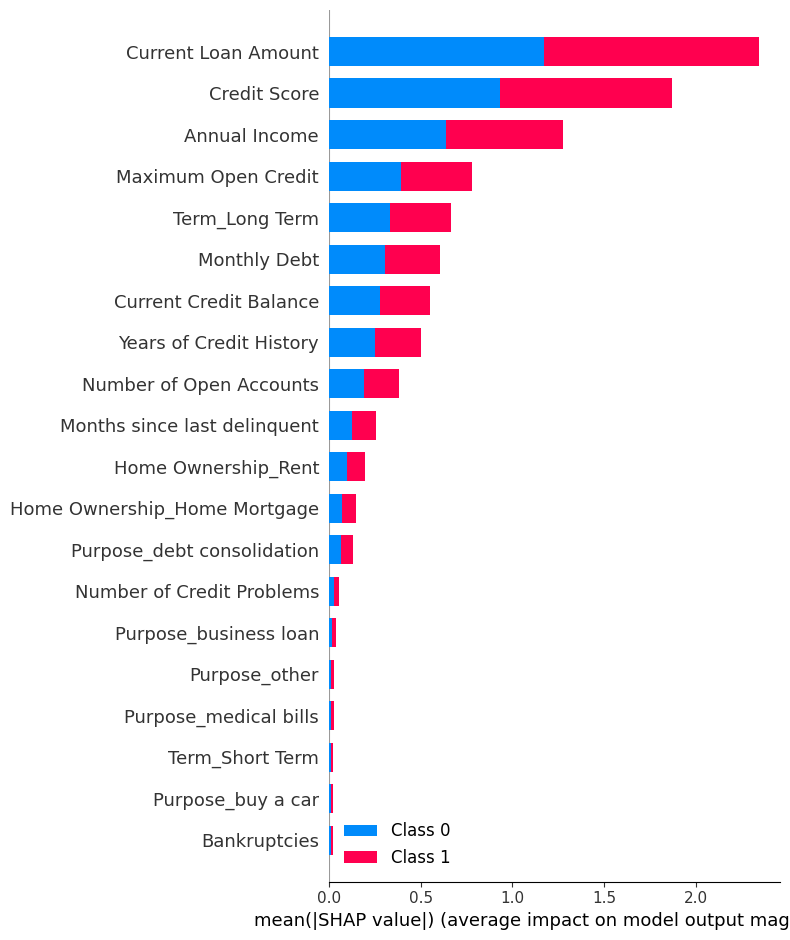

In [ ]:
# 可视化所有类别的SHAP 汇总图
shap.summary_plot(shap_values, X_train)

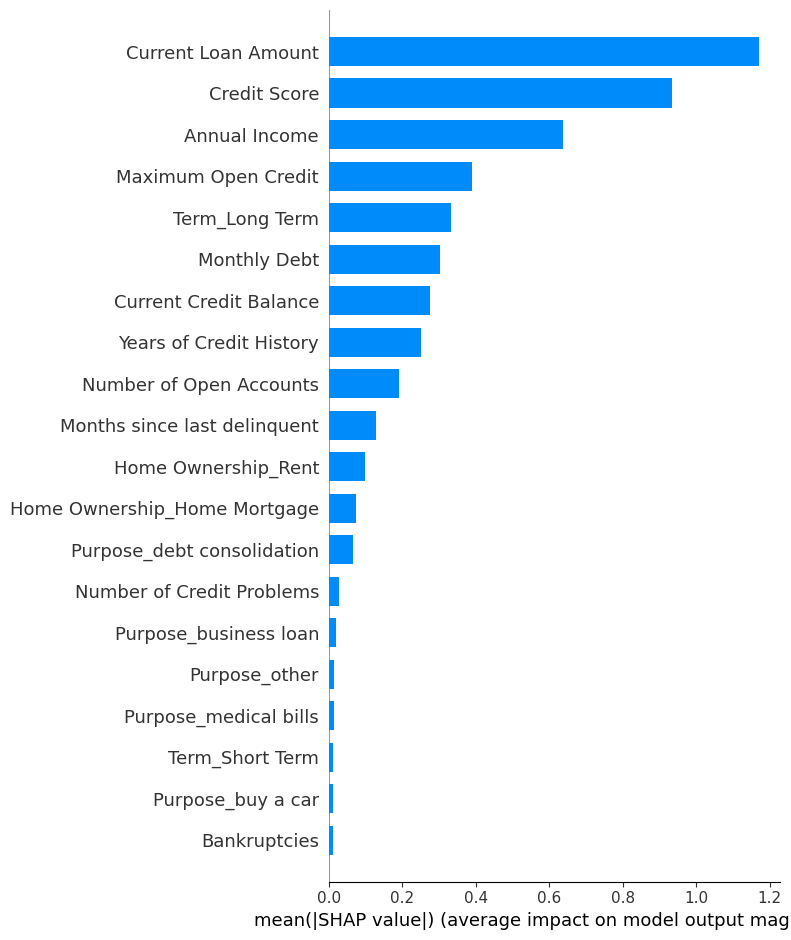

In [ ]:
# SHAP 汇总图设置为条形图，可以显示特征重要性
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

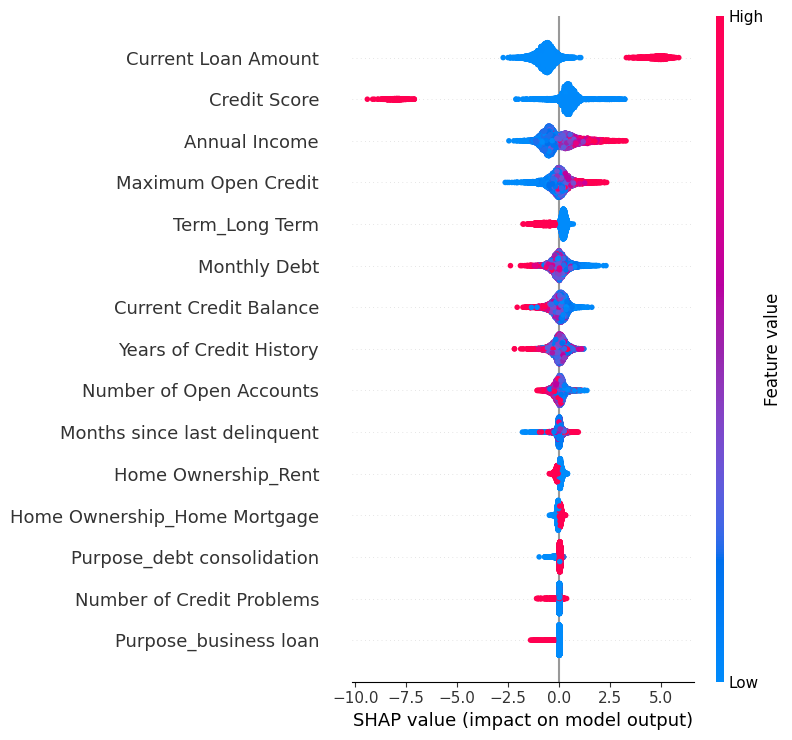

In [ ]:
# SHAP 汇总图默认设置为点图，可以反应特征的重要性和影响方向
shap.summary_plot(shap_values[0], X_train,plot_type="dot", max_display=15)

In [ ]:
X_test.info()

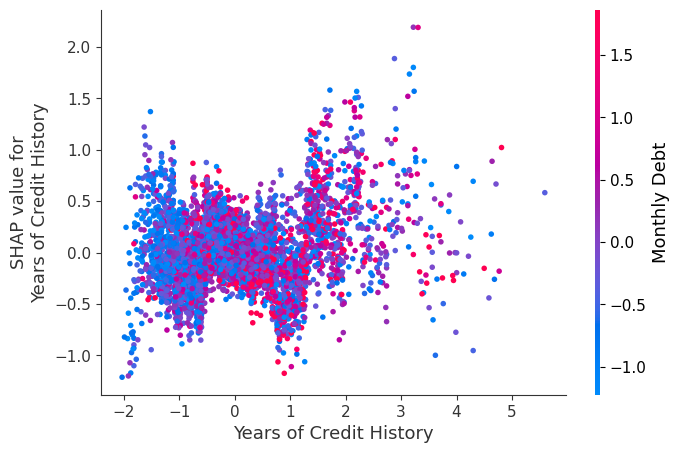

In [ ]:
shap.dependence_plot('Years of Credit History', shap_values[1], X_train, interaction_index="Monthly Debt")
shap.dependence_plot('Tax Liens', shap_values[1], X_train, interaction_index="Annual Income")

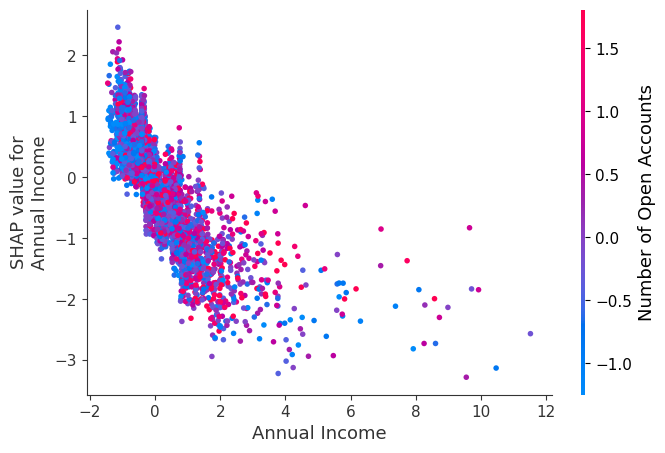

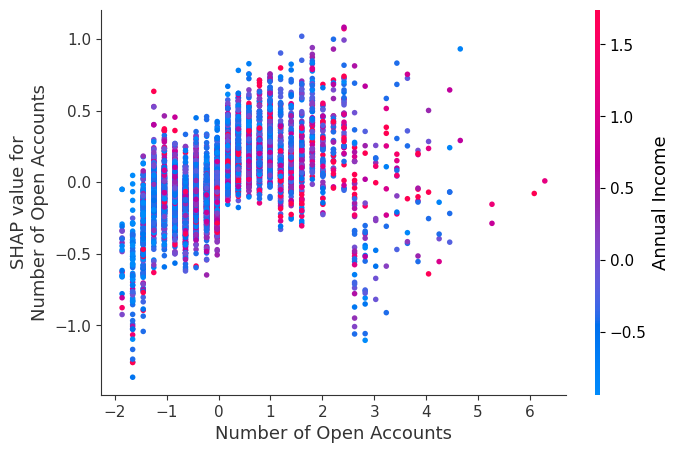

In [ ]:
# 同样的交互效应，也要在意数据的分布来优化可视化的图形
shap.dependence_plot('Annual Income', shap_values[1], X_train, interaction_index="Number of Open Accounts")
shap.dependence_plot('Number of Open Accounts', shap_values[1], X_train, interaction_index="Annual Income")

In [ ]:
shap.dependence_plot('Annual Income', shap_values[1], X_train, interaction_index="Tax Liens")
shap.dependence_plot('Tax Liens', shap_values[1], X_train, interaction_index="Annual Income")

In [ ]:
shap.dependence_plot('Monthly Debt', shap_values[1], X_train, interaction_index="Credit Score")
shap.dependence_plot('Credit Score', shap_values[1], X_train, interaction_index="Monthly Debt")